In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

In [3]:
data = pd.read_csv("diabetes_cleaned.csv")
data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,2,138,62,35,0,33.6,0.127,47,1
1,1,0,84,82,31,125,38.2,0.233,23,0
2,3,0,135,68,42,250,42.3,0.365,24,1
3,5,0,173,78,32,265,46.5,1.159,58,0
4,6,4,99,72,17,0,25.6,0.294,28,0
...,...,...,...,...,...,...,...,...,...,...
1206,1992,6,134,70,23,130,35.4,0.542,29,1
1207,1994,1,79,60,42,48,43.5,0.678,23,0
1208,1995,2,75,64,24,55,29.7,0.370,33,0
1209,1996,8,179,72,42,130,32.7,0.719,36,1


In [4]:
y = data.Outcome
X = data.drop(['Outcome','SkinThickness','Pregnancies'],axis=1)

In [5]:
X

,Unnamed: 0,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,138,62,0,33.6,0.127,47
1,1,84,82,125,38.2,0.233,23
2,3,135,68,250,42.3,0.365,24
3,5,173,78,265,46.5,1.159,58
4,6,99,72,0,25.6,0.294,28
...,...,...,...,...,...,...,...
1206,1992,134,70,130,35.4,0.542,29
1207,1994,79,60,48,43.5,0.678,23
1208,1995,75,64,55,29.7,0.370,33
1209,1996,179,72,130,32.7,0.719,36


In [6]:
# Split the dataset into 70% Training and 30% Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
# Perform Classification Using Decision Tree Classifier

In [8]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.8461538461538461

In [9]:
# Perform Classification Using Random Forest Classifier

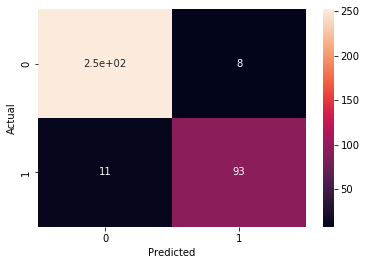

In [14]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)
Y_pred = rf_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred) 
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [ ]:
# Perform Classification Using Gradient Boosting Classifier

In [ ]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)


0.8956043956043956

In [ ]:
# Let's  tune this Gradient booster.
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.8681318681318682

In [ ]:
# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
nb_clf.score(X_test, y_test)

0.8131868131868132

In [ ]:
# K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
knn_clf.score(X_test, y_test)

0.7142857142857143

In [ ]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test, y_test)

/home/pavan/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8214285714285714

In [ ]:
# SVM classifier
from sklearn.svm import SVC
sv_clf = SVC(probability=True)
sv_clf.fit(X_train,y_train)
sv_clf.score(X_test, y_test)

0.7142857142857143

In [ ]:
# Prediction Probabilities
r_probs= [0 for _ in range(len(y_test))]


rf_probs = rf_clf.predict_proba(X_test) 
nb_probs= nb_clf.predict_proba(X_test)
dt_probs= dt_clf.predict_proba(X_test)

gb_probs=gb_clf.predict_proba(X_test)

knn_probs=knn_clf.predict_proba(X_test) 
lr_probs=lr_clf.predict_proba(X_test)

sv_probs=sv_clf.predict_proba(X_test)

In [ ]:
# Probabilities for the positive outcome is kept

rf_probs = rf_probs[:,1]

nb_probs=nb_probs[:, 1] 
dt_probs=dt_probs[:, 1]

gb_probs=gb_probs[:,1]

knn_probs = knn_probs[:, 1]
lr_probs=lr_probs[:, 1]

sv_probs = sv_probs[:,  1]

In [ ]:
# Compute the AUROC Values



from sklearn.metrics import roc_curve, roc_auc_score 
r_auc=roc_auc_score(y_test, r_probs)

rf_auc=roc_auc_score(y_test, rf_probs) 
nb_auc=roc_auc_score(y_test, nb_probs)

dt_auc=roc_auc_score(y_test, dt_probs)

gb_auc=roc_auc_score(y_test, gb_probs)

knn_auc=roc_auc_score(y_test, knn_probs)

lr_auc=roc_auc_score(y_test, lr_probs) 
sv_auc=roc_auc_score(y_test, sv_probs)



In [ ]:
#Display the AUROC Scores

print("Random Prediction: AUROC=%.3f" %(r_auc)) 
print("Random Forest: AUROC %.3f" %(rf_auc))

print("Naive Bayes AUROC %.3f" %(nb_auc))

print("Decistion Tree Prediction: AUROC %.3f" %(dt_auc)) 
print("Gradient Boosting Prediction: AUROC %.3f" %(gb_auc))

print("XNearest neighbors Prediction: AUROC = .3f" %(knn_auc))

print("Logistic Regresssion: AUROC %.3f" %(lr_auc))

print("Support Vector Machine: AUROC %.3f" %(sv_auc))

Random Prediction: AUROC=0.500
Random Forest: AUROC 0.978
Naive Bayes AUROC 0.839
Decistion Tree Prediction: AUROC 0.896
Gradient Boosting Prediction: AUROC 0.935
XNearest neighbors Prediction: AUROC = .3f
Logistic Regresssion: AUROC 0.839
Support Vector Machine: AUROC 0.819


In [ ]:
r_fpr, r_tpr,_= roc_curve(y_test, r_probs)

rf_fpr, rf_tpr,_= roc_curve(y_test, rf_probs) 
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

dt_fpr, dt_tpr,_= roc_curve(y_test, dt_probs)

gb_fpr, gb_tpr,_= roc_curve(y_test, gb_probs)

knn_fpr, knn_tpr,_ = roc_curve(y_test, knn_probs) 
lr_fpr, lr_tpr,_= roc_curve(y_test, lr_probs)

sv_fpr, sv_tpr,_= roc_curve(y_test, sv_probs)

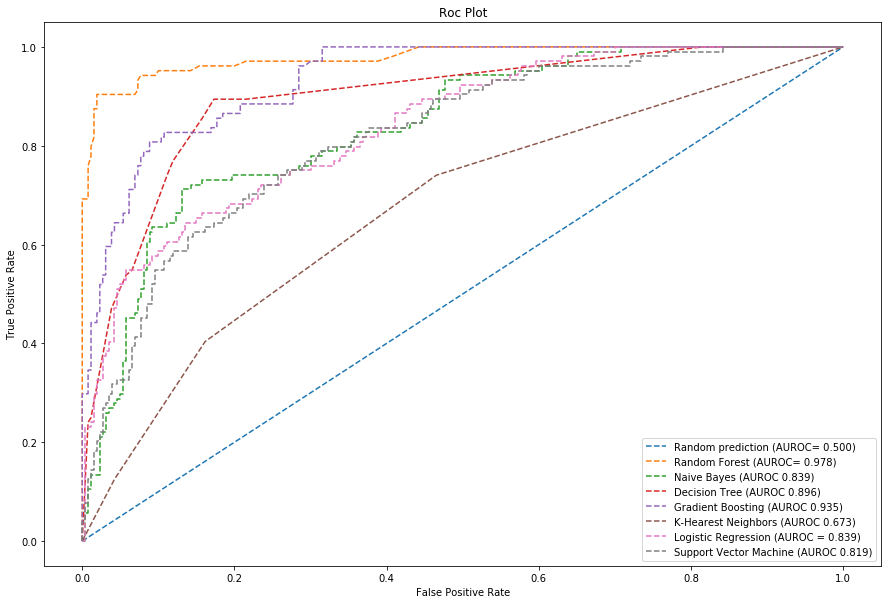

In [ ]:
#plot the ROC curve
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC= %0.3f)' %r_auc) 
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (AUROC= %0.3f)' %rf_auc) 
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='Naive Bayes (AUROC %0.3f)' %nb_auc) 
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decision Tree (AUROC %0.3f)' %dt_auc) 
plt.plot(gb_fpr, gb_tpr, linestyle='--', label='Gradient Boosting (AUROC %0.3f)' %gb_auc) 
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='K-Hearest Neighbors (AUROC %0.3f)' %knn_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression (AUROC = %0.3f)' %lr_auc) 
plt.plot(sv_fpr, sv_tpr, linestyle='--',label='Support Vector Machine (AUROC %0.3f)' %sv_auc)

#Title

plt.title('Roc Plot')

#Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Show Legend
plt.legend()
plt.show()